In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_city_Day.csv')
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,14.89,0.920,27.64,133.36,149.0,Moderate,1,2015
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,14.89,0.970,24.55,34.06,106.0,Moderate,1,2015
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,14.89,17.400,29.07,30.70,303.0,Very Poor,1,2015
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,14.89,1.700,18.59,36.08,106.0,Moderate,1,2015
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,14.89,22.100,39.33,39.31,330.0,Very Poor,1,2015
5,Ahmedabad,2015-01-06,58.37,107.96,45.41,38.48,81.50,14.89,45.410,45.76,46.51,401.0,Severe,1,2015
6,Ahmedabad,2015-01-07,58.37,107.96,112.16,40.62,130.77,14.89,112.160,32.28,33.47,401.0,Severe,1,2015
7,Ahmedabad,2015-01-08,58.37,107.96,80.87,36.74,96.75,14.89,80.870,38.54,31.89,401.0,Severe,1,2015
8,Ahmedabad,2015-01-09,58.37,107.96,29.16,31.00,48.00,14.89,29.160,58.68,25.75,372.0,Very Poor,1,2015
9,Ahmedabad,2015-01-10,58.37,107.96,16.28,7.04,0.00,14.89,16.245,8.29,4.55,289.0,Poor,1,2015


In [3]:
pollutants = df.columns[2:11].values
pollutants

array(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'],
      dtype=object)

In [4]:
x = df.iloc[:, 2:11]
y = df.loc[:, 'AQI']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [6]:
x_test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
21332,23.745,77.88,25.34,21.46,41.88,13.97,0.00,12.67,29.62
19377,212.410,96.12,11.52,51.85,17.23,29.71,1.52,10.33,61.73
4320,42.190,131.75,4.07,25.22,0.00,28.36,1.46,6.85,22.58
21127,23.745,77.88,25.34,21.46,22.24,13.97,0.00,12.67,29.62
3592,24.760,93.78,16.61,8.31,24.60,11.93,0.65,10.76,32.52
...,...,...,...,...,...,...,...,...,...
5593,17.600,45.11,3.45,13.32,12.94,5.31,0.57,7.11,14.91
6891,21.880,74.23,7.22,12.43,12.30,72.55,0.71,13.58,14.99
18878,62.190,96.12,10.15,12.36,4.22,29.71,2.10,9.24,29.04
22606,29.740,110.21,17.76,8.21,23.70,4.38,0.28,13.73,23.93


In [7]:
print(f"Actual Data size: {df.shape}")
print(f"Training Data size: {x_train.shape}")
print(f"Test Data size: {x_test.shape}")

Actual Data size: (27963, 15)
Training Data size: (19574, 9)
Test Data size: (8389, 9)


In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [10]:
y_train

array([[-0.59776401],
       [-0.24301839],
       [ 1.59586707],
       ...,
       [ 8.24191766],
       [ 1.24112145],
       [-0.46020958]])

In [11]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [12]:
print(f"Coeff={reg_model.coef_}")
print(f"\nIntercept={reg_model.intercept_}")

Coeff=[[ 0.46783245  0.1528447  -0.0093497   0.04704533  0.02223665  0.0054595
   0.56914032  0.08180216  0.03588271]]

Intercept=[-1.44912201e-16]


In [13]:
y_pred = reg_model.predict(x_test)
y_pred

array([[-0.59008924],
       [ 1.10352978],
       [-0.2749889 ],
       ...,
       [-0.14321846],
       [-0.50116501],
       [ 0.72046491]])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 0.21385417856809152
MSE: 0.18376038821880056
RMSE: 0.428672821880278
R2: 0.7937755501351973


In [15]:
y_test = sc_y.inverse_transform(y_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred[:5]

array([[ 80.06009339],
       [313.99485596],
       [123.584005  ],
       [ 78.0511412 ],
       [ 87.3160906 ]])

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 29.539067323903062
MSE: 3505.9843726707877
RMSE: 59.21135341022689
R2: 0.7937755501351973


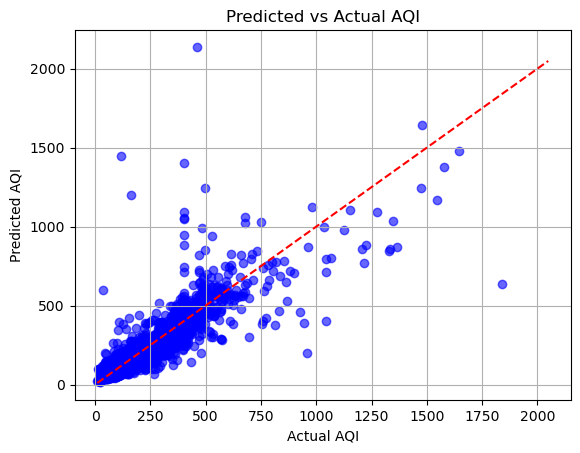

In [17]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree reference line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI")
plt.grid(True)
plt.show()


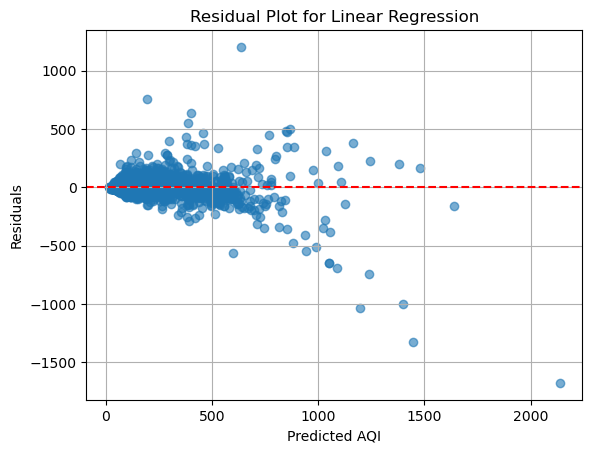

In [18]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.grid(True)
plt.show()


In [19]:
# considering only 70 points, starting from a random position to check the fit visually.
df_MLR = pd.DataFrame({'Actual':y_test[80:150].flatten(), 'Predicted':y_pred[80:150].flatten()})
df_MLR.head(10)

,Actual,Predicted
0,40.0,65.469119
1,95.0,104.671953
2,110.0,84.526230
3,86.0,92.879179
4,108.0,131.593068
5,106.0,76.544432
6,102.0,89.025520
7,126.0,158.912191
8,57.0,68.157337
9,57.0,67.539294


<Figure size 2000x500 with 0 Axes>

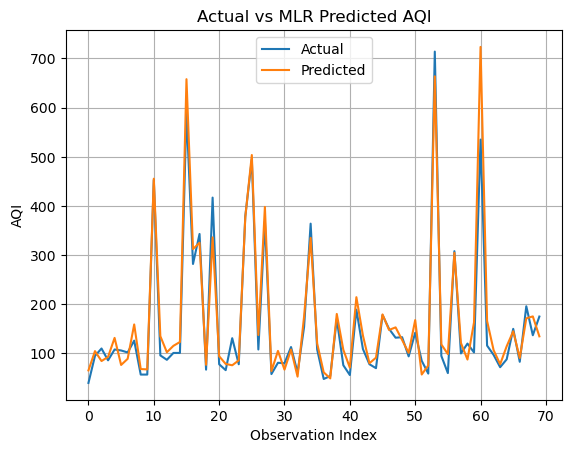

In [20]:
plt.figure(figsize=(20,5))
df_MLR.plot(kind='line')
plt.title('Actual vs MLR Predicted AQI')
plt.xlabel('Observation Index')
plt.ylabel('AQI')
plt.grid()
plt.savefig('MLR_Prediction.png')
plt.show()

#################################################################################################

In [21]:
#!pip install xgboost

In [22]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(x_train, y_train)

y_pred_xg = model.predict(x_test)


In [35]:
print("Train R2:", model.score(x_train, y_train))
print("Test R2:", r2_score(y_test, y_pred_xg))


Train R2: 0.9357255279113186
Test R2: -1.4595373579491935


In [23]:
mae = mean_absolute_error(y_test, y_pred_xg)
mse = mean_squared_error(y_test, y_pred_xg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xg)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 158.21915120425015
MSE: 41814.14738467252
RMSE: 204.48507863575895
R2: -1.4595373579491935


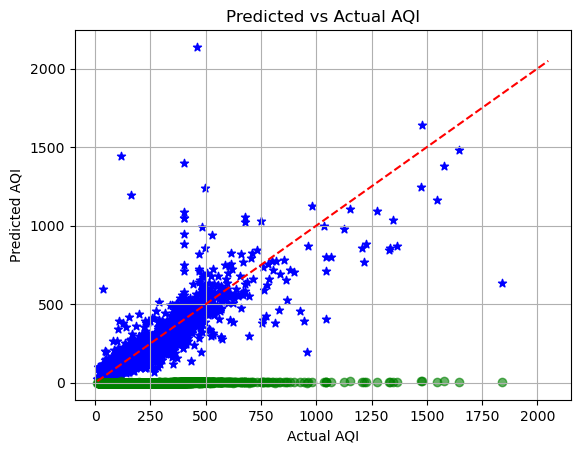

In [24]:
plt.scatter(y_test, y_pred, color='blue', marker="*")
plt.scatter(y_test, y_pred_xg, color='green', alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree reference line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI")
plt.grid(True)
plt.show()


In [25]:
# As for a single date, there are multiple entries for various cities, we group the data by dates.
df_daily = df.groupby('Date')[['PM2.5',	'PM10',	'NO',	'NO2',	'NOx',	'NH3',	'CO',	'SO2',	'O3', 'AQI']].mean()
df_daily = pd.DataFrame(df_daily).reset_index()
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,2015-01-01,92.981667,169.590833,19.515000,20.375000,32.208333,19.561667,4.961667,38.645000,42.110000,180.333333
1,2015-01-02,71.808333,113.185833,18.885000,18.988333,28.638333,20.328333,4.515000,37.651667,24.540000,174.666667
2,2015-01-03,55.308333,90.244167,15.395000,20.490000,23.103333,22.845000,9.826667,46.000000,21.318333,190.333333
3,2015-01-04,62.644286,106.555000,10.720000,20.615714,20.894286,29.912857,4.491429,34.644286,24.405714,148.142857
4,2015-01-05,61.895714,103.310714,12.294286,19.747143,21.915714,33.241429,6.800000,35.901429,23.727143,177.285714
...,...,...,...,...,...,...,...,...,...,...,...
2004,2020-06-27,24.583600,55.312400,9.011200,15.032400,15.977600,13.106400,0.740000,9.354400,31.671600,72.600000
2005,2020-06-28,25.400800,63.704400,10.388400,12.832000,15.405200,13.210400,0.723200,9.628000,30.000400,77.480000
2006,2020-06-29,24.008000,56.696800,11.155200,14.639200,17.970800,14.098000,0.759600,9.899600,28.765600,76.400000
2007,2020-06-30,23.941600,49.778000,10.100000,15.284800,18.369600,12.833200,0.756000,9.926800,28.860400,70.400000


In [26]:
list1 = ['PM2.5',	'PM10',	'NO',	'NO2',	'NOx',	'NH3',	'CO', \
         'SO2',	'O3',	'AQI']

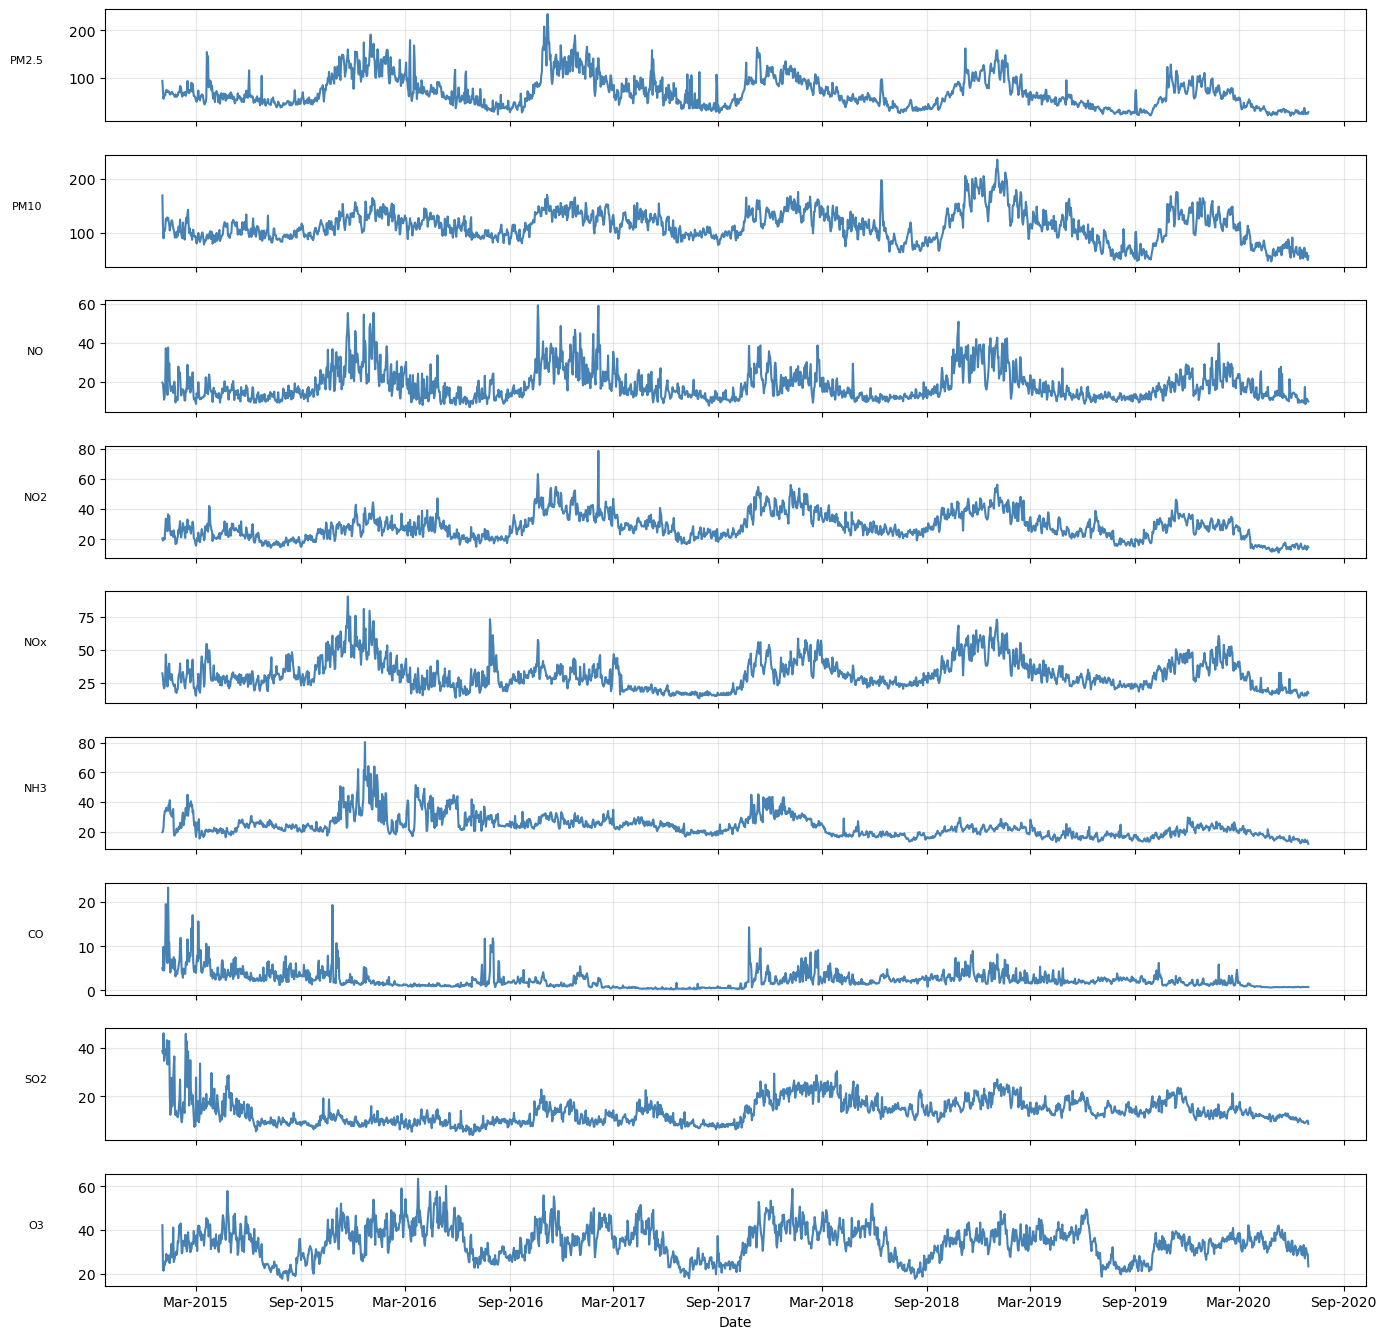

In [34]:
import matplotlib.dates as mdates

list1 = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
num_vars = len(list1)

# Create a tall and narrow figure
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(14, 1.5 * num_vars), sharex=True)

for i, pol in enumerate(list1):
    ax = axes[i]
    sns.lineplot(data=df_daily, x='Date', y=pol, ax=ax, color='steelblue')
    ax.set_ylabel(pol, rotation=0, labelpad=30, fontsize=8)
    ax.set_title('', fontsize=8)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Only show x-labels on the bottom plot
    if i != len(list1) - 1:
        ax.set_xlabel('')
        ax.set_xticklabels([])

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Final layout adjustments
plt.tight_layout(h_pad=0.1)  # tight vertical spacing
plt.subplots_adjust(hspace=0.3)
plt.savefig('DailyPollutantConc.png')
plt.show()

